<a href="https://colab.research.google.com/github/PavansaiGundaram/COMPUTATIONAL-METHODS-INFO-5731-ASSIGNMENTS/blob/main/Gundaram_Pavansai_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here
import requests
from bs4 import BeautifulSoup
import csv

# Here is the IMDB reviews page of the movie Mission Impossible- Dead Recknoing (2023) which is data i took in Assignment-2
url_movie = "https://www.imdb.com/title/tt9603212/reviews?ref_=tt_urv"
review_page_no = 50
movie_reviews = []

for review_page in range(1, review_page_no + 1):
    url_review_page = f"{url_movie}?start={((review_page - 1) * 10)}"
    response = requests.get(url_review_page)
    if response.status_code == 200:
        movie_soup = BeautifulSoup(response.text, 'html.parser')
        review_elements = movie_soup.find_all("div", class_="text show-more__control")
        for review_element in review_elements:
            review_text = review_element.get_text(strip=True)
            movie_reviews.append(review_text)
    else:
        print(f"Unable to find reviews in IMDb page {review_page}. Give the working URL.")

# Intializing the creation of CSV file
with open("Mission_Impossible_movie_reviews.csv", "w", newline="", encoding="utf-8") as csvfile:
    build = csv.writer(csvfile)
    build.writerow(["Viewer Reviews"])
    for viewer_review in movie_reviews:
        build.writerow([viewer_review])

print("I had collected the Movie Reviews of MISSION IMPOSSIBLE-DEAD RECKONING[PART ONE]")
print(f"I had Gathered {len(movie_reviews)} Viewer reviews and stored to 'Mission_Impossible_movie_reviews.csv' file.")

I had collected the Movie Reviews of MISSION IMPOSSIBLE-DEAD RECKONING[PART ONE]
I had Gathered 1250 Viewer reviews and stored to 'Mission_Impossible_movie_reviews.csv' file.


In [2]:
import pandas as pd
import nltk
nltk.download('all')
from nltk import word_tokenize, pos_tag
from nltk.util import ngrams
from collections import Counter

imdb_reviews = pd.read_csv('Mission_Impossible_movie_reviews.csv')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [3]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initializing NLTK elements
stop_wrds = set(stopwords.words('english'))
lemmatization = WordNetLemmatizer()


# Intializing the function for cleaning of the reviews
def cleaning_text(txt):
    txt = re.sub(r'http\S+', '', txt)

    # Deleting punctuation and special characters, leaving only alphabetic words
    txt = re.sub(r'[^a-zA-Z\s]', '', txt)

    # Text conversion to lowercase
    txt = txt.lower()

    # Tokenization of text
    tokens = word_tokenize(txt)

    # Removing stop phrases and tokens with only one character
    tokens = [lemmatization.lemmatize(token) for token in tokens if token not in stop_wrds and len(token) > 1]

    # joining tokens into a phrase
    clean_text = ' '.join(tokens)
    return clean_text

imdb_reviews['cleaning_text'] = imdb_reviews['Viewer Reviews'].apply(cleaning_text)
first_tweets = imdb_reviews.head(100)

In [4]:
subset_sample_reviews = first_tweets['cleaning_text'][:100]

In [5]:
def extracting_ngrams(txt, n):
    tokens = nltk.word_tokenize(txt)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]
#(1) Count the frequency of all the N-grams (N=3).
n = 3
ngram_freq = Counter()
for review in subset_sample_reviews:
    ngram_freq.update(extracting_ngrams(review, n))
print("Frequency of all the N-grams where (N=3):")
print(ngram_freq.most_common)

Frequency of all the N-grams where (N=3):
<bound method Counter.most_common of Counter({'dead reckoning part': 32, 'reckoning part one': 20, 'mission impossible dead': 16, 'impossible dead reckoning': 16, 'mission impossible movie': 12, 'henry czerny kittridge': 12, 'mission impossible franchise': 12, 'dont get wrong': 8, 'series mission impossible': 8, 'movie felt like': 8, 'action set piece': 8, 'top gun maverick': 8, 'benji simon pegg': 8, 'know cruise actually': 8, 'latest mission impossible': 8, 'seen biggest screen': 8, 'biggest screen possible': 8, 'rhames simon pegg': 8, 'shea whigham greg': 8, 'whigham greg tarzan': 8, 'greg tarzan davis': 8, 'like hayley atwell': 8, 'stretch running time': 8, 'almost three hour': 8, 'ingenious problem solvingin': 8, 'fallout top gun': 8, 'venice car chase': 8, 'part one another': 8, 'movie experience ive': 8, 'experience ive ever': 8, 'ive ever experienced': 8, 'man wish loved': 4, 'wish loved movie': 4, 'loved movie dont': 4, 'movie dont get

In [6]:
# (2) Calculating all probabilities for bigrams

n = 2
bigram_quant = Counter()
unigram_quant = Counter()
for review in subset_sample_reviews:
    tokens = nltk.word_tokenize(review)
    unigram_quant.update(tokens)
    bigram_quant.update(ngrams(tokens, n))

bigram_prob = {}
for bigram, freq in bigram_quant.items():
    word1, word2 = bigram
    bigram_prob[bigram] = freq / unigram_quant[word1]
print("Here is the Probabilities for all the bigrams:")
for bigram, probability in list(bigram_prob.items())[:10]:
    print(f"{bigram}: {probability:.2f}")

Here is the Probabilities for all the bigrams:
('man', 'wish'): 0.20
('wish', 'loved'): 0.33
('loved', 'movie'): 1.00
('movie', 'dont'): 0.02
('dont', 'get'): 0.23
('get', 'wrong'): 0.12
('wrong', 'solid'): 0.25
('solid', 'action'): 0.20
('action', 'movie'): 0.10
('movie', 'jawdropping'): 0.02


In [7]:
# (3) Extracting noun phrases and calculate relative probabilities

#initializing functions for extraction of noun phrases
def extracting_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tags = pos_tag(tokens)
    grammar = r"NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(tags)
    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))
    return noun_phrases

noun_phrase_freq = Counter()
for review in subset_sample_reviews:
    noun_phrases = extracting_noun_phrases(review)
    noun_phrase_freq.update(noun_phrases)

maxm_quant = max(noun_phrase_freq.values())
relative_probabilities = {index + 1: {noun_phrase: freq / maxm_quant for noun_phrase, freq in noun_phrase_freq.items()}
                         for index, _ in enumerate(imdb_reviews['Viewer Reviews'])}

print("(3) Here is the Relative probabilities of noun phrases for each review:")
df_relative_probabilities = pd.DataFrame(relative_probabilities).T.fillna(0)
print(df_relative_probabilities)
df_relative_probabilities.head()

(3) Here is the Relative probabilities of noun phrases for each review:
           man     movie      dont  wrong solid action  jawdropping     stunt  \
1     0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
2     0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
3     0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
4     0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
5     0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
...        ...       ...       ...                 ...          ...       ...   
1246  0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
1247  0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
1248  0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
1249  0.081633  0.795918  0.142857            0.020408     0.020408  0.265306   
1250  0.081633  0.795918  0.142857   

,man,movie,dont,wrong solid action,jawdropping,stunt,series,mission,impossible movie,small step,...,solid franchise,great story,great performance,great action,great everything,blast,thank,heart,amazing,sir
1,0.081633,0.795918,0.142857,0.020408,0.020408,0.265306,0.102041,0.387755,0.061224,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
2,0.081633,0.795918,0.142857,0.020408,0.020408,0.265306,0.102041,0.387755,0.061224,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
3,0.081633,0.795918,0.142857,0.020408,0.020408,0.265306,0.102041,0.387755,0.061224,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
4,0.081633,0.795918,0.142857,0.020408,0.020408,0.265306,0.102041,0.387755,0.061224,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
5,0.081633,0.795918,0.142857,0.020408,0.020408,0.265306,0.102041,0.387755,0.061224,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [8]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


docmts = first_tweets['cleaning_text'].tolist()
vectorizer = TfidfVectorizer()
TFIDF_matrix = vectorizer.fit_transform(docmts)

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

query = "Marvelous movie with great action sequences and stunts"

# appending the query to document list
docmts.append(query)

# Calculating similarity
cosine_similarities = cosine_similarity(TFIDF_matrix[-1], TFIDF_matrix[:-1])

# Sorting documents according to the similarity score
ranked_documents = [(similarity, idx) for idx, similarity in enumerate(cosine_similarities[0])]
ranked_documents = sorted(ranked_documents, key=lambda x: x[0], reverse=True)

# printing out ranked documents based on similarity
print("Ranking of documents based on the query:")
for similarity, idx in ranked_documents:
    print(f"Document {idx + 1}: Similarity = {similarity:.4f}")
    print(f"Review: {imdb_reviews['Viewer Reviews'][idx]}")
    print("-" * 50)

Ranking of documents based on the query:
Document 25: Similarity = 1.0000
Review: A Part One that still felt like a complete movie, this is how you make a great movie in a franchise that's already going for almost 30 years and they still nailed it and keeps getting better or still as great, when you handing it on the right person like Tom Cruise who are giving his 100%, and makes a really careful good decision then it will work, Mission: Impossible - Dead Reckoning Part One was another achievement in action movies as a whole, this is the most serious MI movie experience i've ever experienced and one of the most serious movie experience i've ever experienced as i really locked in and really engaged to the story, following every single dialogue that are really well written, and man do we have to talk about the performance, Tom Cruise, Ving Rhames, and Simon Pegg was like a family already and i'm pretty sure they did not need any rehearsal as they chemistry was already there since the fif

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [12]:
pip install gensim

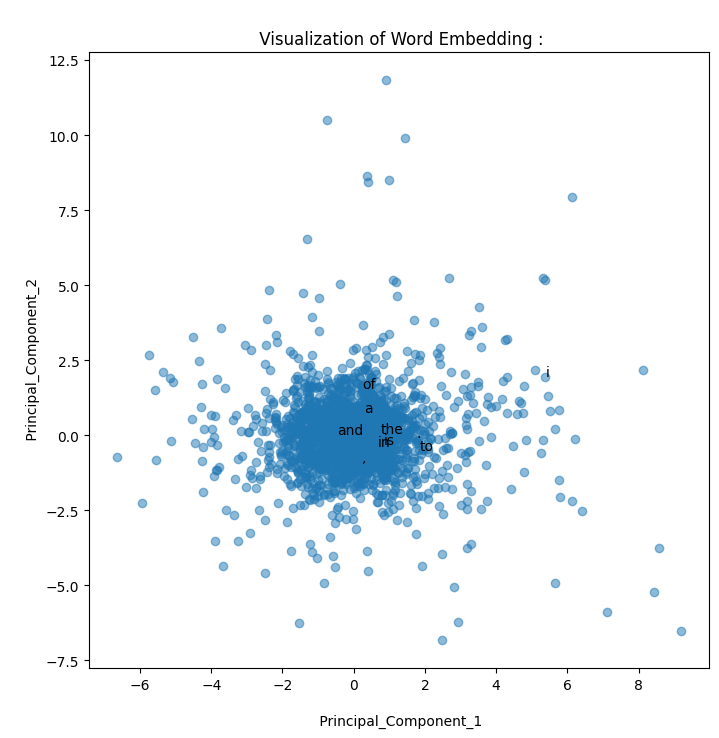

In [15]:
#importing required libraries
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

doc = imdb_reviews['Viewer Reviews'].tolist()

# Tokenization of the sentences into words
tokenization_data = [word_tokenize(review.lower()) for review in doc]

# Training the data with Word2Vec model
Word2Vec_model = Word2Vec(sentences=tokenization_data, vector_size=300, window=5, min_count=1, workers=4)

# Visualizatiion of word embeddings using PCA

words = list(Word2Vec_model.wv.index_to_key)
vectors = Word2Vec_model.wv[words]

pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(8, 8))
plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1], alpha=0.5)
num_words_to_annotate = 10
for i, word in enumerate(words[:num_words_to_annotate]):
    plt.annotate(word, xy=(pca_vectors[i, 0], pca_vectors[i, 1]))

plt.xlabel('\n Principal_Component_1')
plt.ylabel('\n Principal_Component_2')
plt.title('\n Visualization of Word Embedding :')
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/PavansaiGundaram/COMPUTATIONAL-METHODS-INFO-5731-ASSIGNMENTS/blob/main/annotated_tweets_Imdb_Reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

Ans: This assignment was a great learning experience where i have learned about the N-gram implementation form scratch and calculating the probabilities of bigrams.

Extracting noun phrases and ranking the documents has been challenging for me still i have taken refrencence from provided links and done the task.